In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
path = Path('spr')

In [5]:
possible_moves = 'scissor', 'paper', 'rock'

In [6]:
fns = get_image_files(path)
fns

(#4376) [Path('spr/paper/W79peyAyfQqNP1vF.png'),Path('spr/paper/7ZGsbIMypDIEZxR0.png'),Path('spr/paper/DsaaqkHZUN3pmcwH.png'),Path('spr/paper/P1STllnKDD05zo29.png'),Path('spr/paper/RlpqfQnTgM6AxUNs.png'),Path('spr/paper/ukOGooYiFOfJHNrx.png'),Path('spr/paper/BfFGJgByTJnxADwA.png'),Path('spr/paper/V9v5VHsYgQOVnzo2.png'),Path('spr/paper/nXOxF15xZFtfflkL.png'),Path('spr/paper/coKLsdqkvkYUv247.png')...]

In [7]:
failed = verify_images(fns)
failed

(#0) []

In [8]:
failed.map(Path.unlink);

In [9]:
spr = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128))

In [10]:
dls = spr.dataloaders(path)

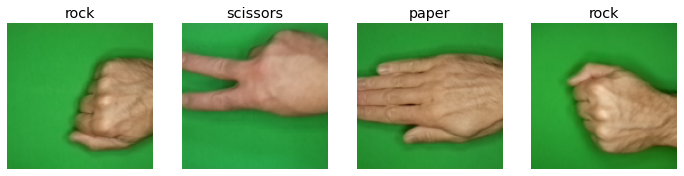

In [11]:
dls.valid.show_batch(max_n=4, nrows = 1)

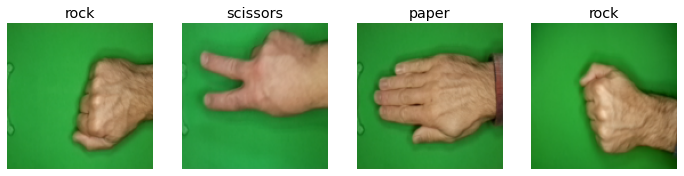

In [12]:
spr = spr.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = spr.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows = 1)

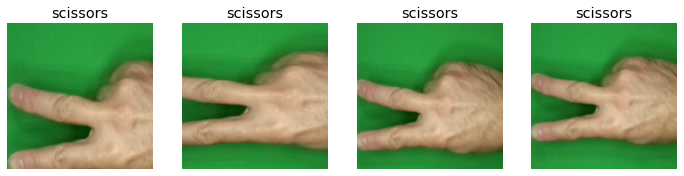

In [13]:
spr = spr.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = spr.dataloaders(path)
dls.train.show_batch(max_n = 4, nrows = 1, unique = True)

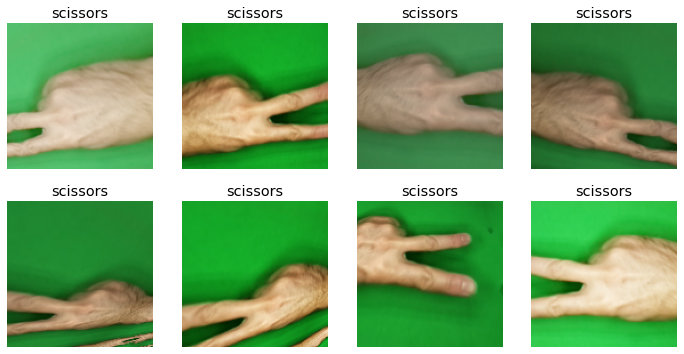

In [15]:
spr = spr.new(item_tfms=Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = spr.dataloaders(path)
dls.train.show_batch(max_n = 8, nrows = 2, unique = True)

In [16]:
spr = spr.new(
    item_tfms=RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms=aug_transforms())
dls = spr.dataloaders(path)

In [17]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.375687,0.049070,0.019429,07:40


epoch,train_loss,valid_loss,error_rate,time
0,0.067302,0.004821,0.002286,09:41
1,0.040754,0.001791,0.001143,5:54:01
2,0.026916,0.000752,0.000000,10:37
3,0.019726,0.002333,0.001143,09:51


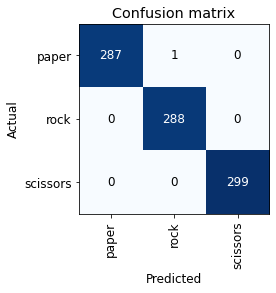

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

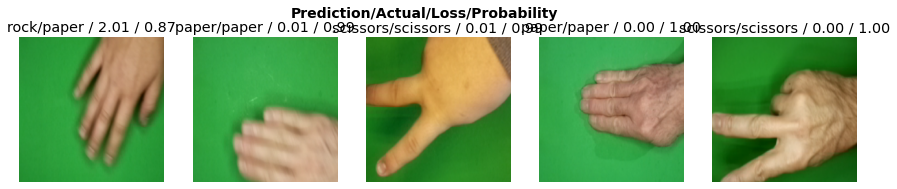

In [19]:
interp.plot_top_losses(5, nrows = 1)